In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo 

## aesthetic evaluation dataset

In [ ]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [2]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Subjective Evaluation')

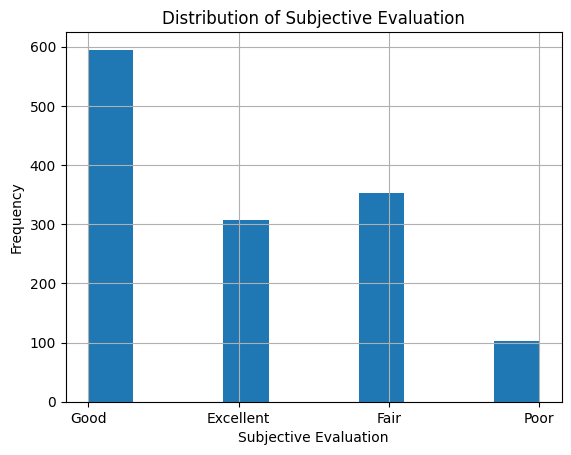

In [ ]:
aesthetic_evaluation_y.hist()
plt.xlabel('Subjective Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Subjective Evaluation')

In [ ]:
# accuracy of 'objective evaluation' (relative to the target, 'subjective evaluation')
acc = np.mean(np.array(aesthetic_evaluation_y) == np.array(aesthetic_evaluation_objective))
print(f'Accuracy: {acc}')

Accuracy: 0.5876288659793815


SBC reduction
number of features:  22
original num target classes:  4
original num observations:  1358
mapping:  0         Good
1    Excellent
2         Fair
3         Poor
dtype: object
new num features:  23
new num target classes:  2
new num observations:  4074  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
1  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
2  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
3  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   
4  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   

          7         8         9  ...        14        15        16        17  \
0  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   
1  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   

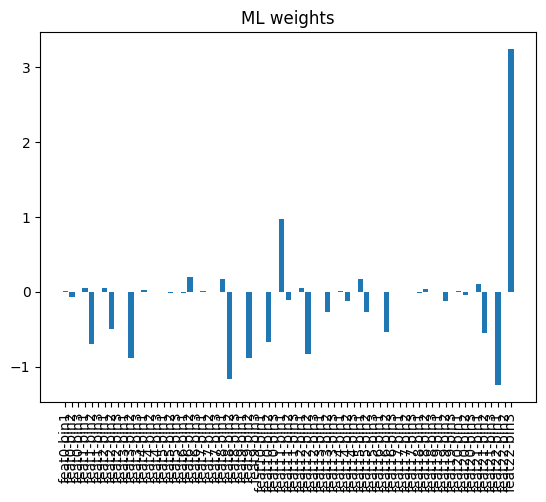

num of zero weights:  32
num of non-zero weights:  37
        Feature    Weight
0    feat0-bin1  0.008848
1    feat0-bin2 -0.076628
3    feat1-bin1  0.052556
4    feat1-bin2 -0.702918
6    feat2-bin1  0.052683
7    feat2-bin2 -0.498183
10   feat3-bin2 -0.881262
12   feat4-bin1  0.024477
13   feat4-bin2 -0.000579
16   feat5-bin2 -0.023560
18   feat6-bin1 -0.023009
19   feat6-bin2  0.190446
21   feat7-bin1  0.011770
22   feat7-bin2 -0.000955
24   feat8-bin1  0.173002
25   feat8-bin2 -1.167225
28   feat9-bin2 -0.880714
31  feat10-bin2 -0.667802
33  feat11-bin1  0.965778
34  feat11-bin2 -0.115409
36  feat12-bin1  0.046432
37  feat12-bin2 -0.829887
40  feat13-bin2 -0.274537
42  feat14-bin1  0.005210
43  feat14-bin2 -0.123489
45  feat15-bin1  0.168562
46  feat15-bin2 -0.264880
49  feat16-bin2 -0.532602
54  feat18-bin1 -0.015138
55  feat18-bin2  0.031766
58  feat19-bin2 -0.125396
60  feat20-bin1  0.006930
61  feat20-bin2 -0.042468
63  feat21-bin1  0.106920
64  feat21-bin2 -0.548795
66  feat22

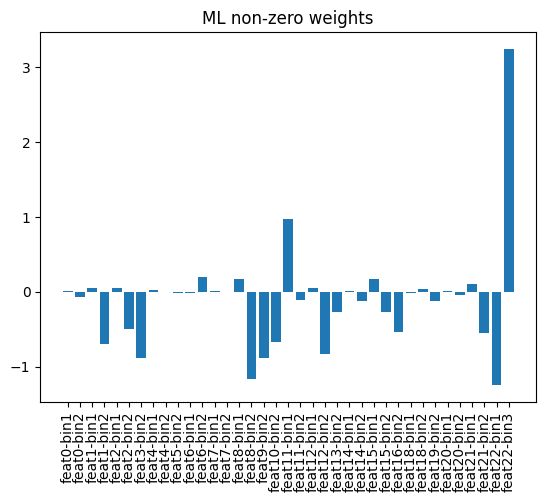

MSEs:  [0.2549019607843137, 0.2549019607843137, 0.25, 0.27450980392156865, 0.23095823095823095, 0.21621621621621623, 0.2113022113022113, 0.25061425061425063, 0.22604422604422605, 0.24078624078624078]
accuracies:  [0.5813148788927336, 0.5916955017301038, 0.5882352941176471, 0.5899653979238755, 0.5755362241848728, 0.5617238860482103, 0.5703565973836244, 0.5789893087190384, 0.582442393253204, 0.5997078159240321]
AUCs:  [0.843187307861221, 0.8327020202020202, 0.8443675889328063, 0.8149154589371981, 0.8788980716253445, 0.8605234159779613, 0.8914049586776859, 0.8607162534435262, 0.8762258953168045, 0.8623415977961432]
mean MSE:  0.24102351014115717
mean accuracy:  0.5819967298177342
mean AUC:  0.856528256877071
Execution time: 7.300786256790161 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
caim_1ook_ml_model, caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=None)

scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [5]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 37


SBC reduction
number of features:  22
original num target classes:  4
original num observations:  1358
mapping:  0         Good
1    Excellent
2         Fair
3         Poor
dtype: object
new num features:  23
new num target classes:  2
new num observations:  4074  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
1  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
2  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
3  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   
4  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   

          7         8         9  ...        14        15        16        17  \
0  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   
1  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   

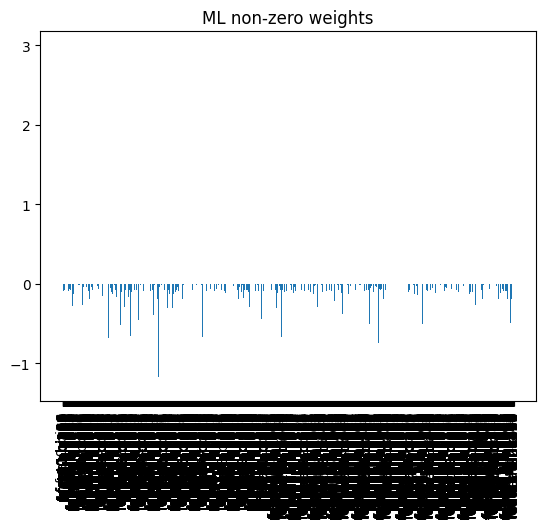

mean accuracy:  0.5818242536679832
Execution time: 86.65691685676575 seconds


In [7]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights,
                show_prints=False)

scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  22
original num target classes:  4
original num observations:  1358
mapping:  0         Good
1    Excellent
2         Fair
3         Poor
dtype: object
new num features:  23
new num target classes:  2
new num observations:  4074  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
1  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
2  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
3  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   
4  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   

          7         8         9  ...        14        15        16        17  \
0  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   
1  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   

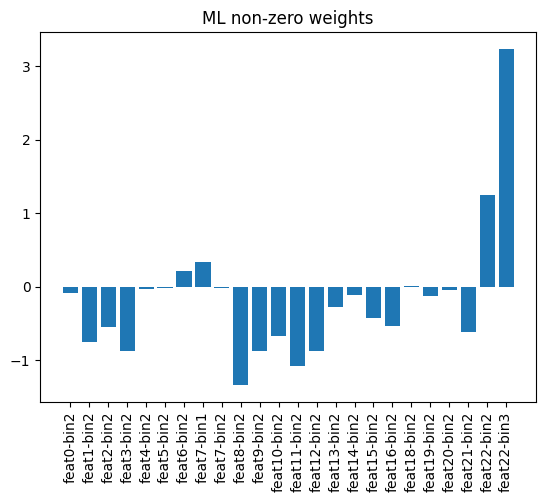

mean accuracy:  0.5817379265546291
Execution time: 5.357934236526489 seconds


In [9]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='ML', 
                use_sbc=True,
                num_nonzero_weights=None,
                show_prints=False)

scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [10]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 24


SBC reduction
number of features:  22
original num target classes:  4
original num observations:  1358
mapping:  0         Good
1    Excellent
2         Fair
3         Poor
dtype: object
new num features:  23
new num target classes:  2
new num observations:  4074  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
1  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
2  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
3  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   
4  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   

          7         8         9  ...        14        15        16        17  \
0  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   
1  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   

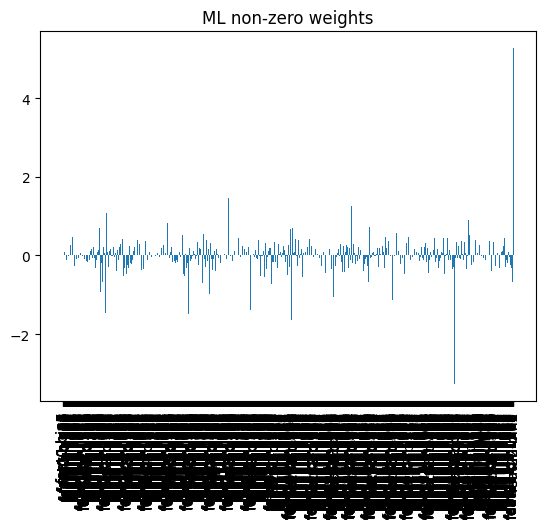

mean accuracy:  0.5819105807813373
Execution time: 495.2937591075897 seconds


In [12]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML', 
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights,
                show_prints=False)

scorecard.cross_val_score()
end_time = time.time()
print(f'Execution time: {end_time - start_time} seconds')

## wine quality dataset
model wine quality, score between 0 and 10, based on physicochemical tests

https://archive.ics.uci.edu/dataset/186/wine+quality

In [10]:
# fetch dataset 
wine_quality_data = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
wine_quality_X = wine_quality_data.data.features 
wine_quality_y = wine_quality_data.data.targets 
  
# metadata 
print(wine_quality_data.metadata) 
  
# variable information 
print(wine_quality_data.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [11]:
wine_quality_y = pd.Series(wine_quality_y['quality'], name='quality')

In [12]:
wine_quality_y.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

Text(0.5, 1.0, 'distribution of wine quality')

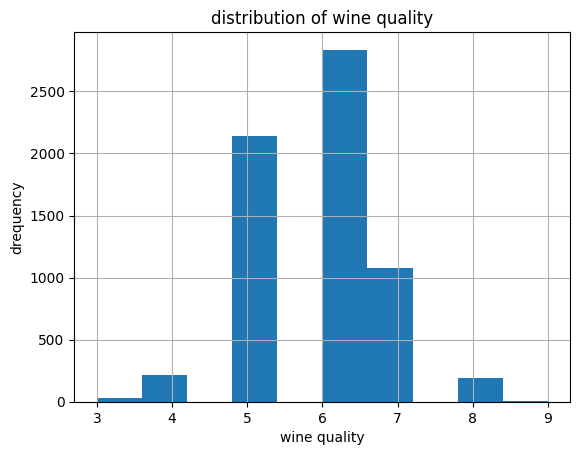

In [13]:
wine_quality_y.hist()
plt.xlabel('wine quality')
plt.ylabel('drequency')
plt.title('distribution of wine quality')

SBC reduction
number of features:  11
original num target classes:  7
original num observations:  6497
new num features:  12
new num target classes:  2
new num observations:  38982  (original num observations * 6 )
     0    1    2    3      4     5     6       7     8     9   10   11  \
0  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  0.0   
1  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  1.0   
2  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  2.0   
3  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  3.0   
4  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  4.0   

   (binary_label)  
0               0  
1               0  
2               0  
3               0  
4               0  

discretization thresholds
num of features:  12
categorical features:  Index([], dtype='object')
index categorical features:  []
sbc_column:  11

thresholds  {0: [3.8, 7.4, 16.9], 1: [0.08, 0.545, 2.58], 2: [0.0, 0.23, 2

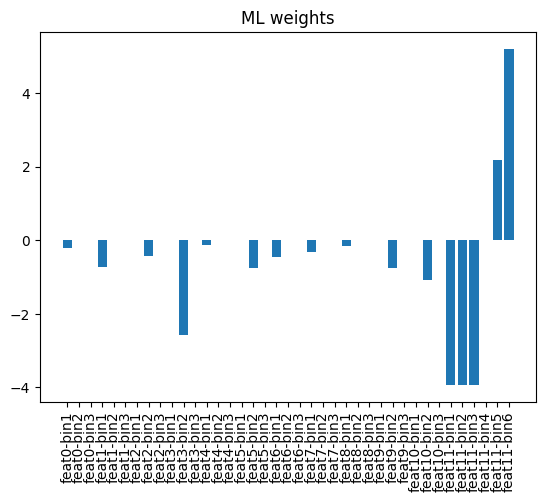

num of zero weights:  23
num of non-zero weights:  16
        Feature    Weight
0    feat0-bin1 -0.199114
3    feat1-bin1 -0.727185
7    feat2-bin2 -0.423515
10   feat3-bin2 -2.576772
12   feat4-bin1 -0.139765
16   feat5-bin2 -0.766526
18   feat6-bin1 -0.462241
21   feat7-bin1 -0.329268
24   feat8-bin1 -0.170890
28   feat9-bin2 -0.761822
31  feat10-bin2 -1.078336
33  feat11-bin1 -3.931445
34  feat11-bin2 -3.931447
35  feat11-bin3 -3.931447
37  feat11-bin5  2.172726
38  feat11-bin6  5.200771


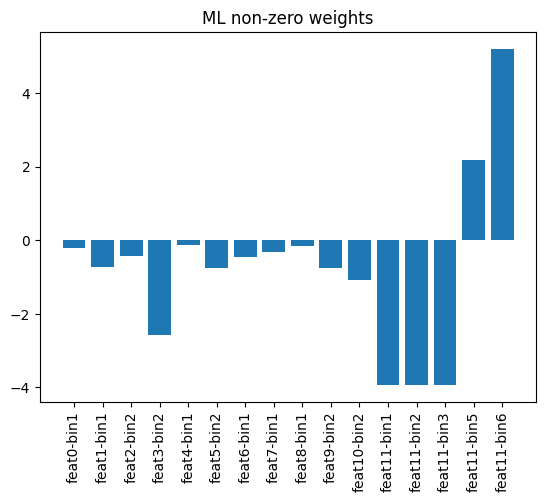

MSEs:  [0.05488586817132598, 0.04488330341113106, 0.055413032324268856, 0.057465366854797334, 0.05438686505900462, 0.054643406875320676, 0.05310415597742432, 0.046947152385838894, 0.05284761416110826, 0.05413032324268856]
accuracies:  [0.8529301118962971, 0.8713130421048899, 0.8777068189051707, 0.891441612319904, 0.8905554966157277, 0.8894478519855072, 0.9040687611044171, 0.9049548768085934, 0.9007458272137558, 0.9067271082169461]
AUCs:  [0.9683291631225048, 0.9688227587962474, 0.955846734126064, 0.9546781325560597, 0.9527083816369117, 0.9564149912225497, 0.9629328690669404, 0.968771736610248, 0.9582646732469942, 0.9624453479513763]
mean MSE:  0.05287070884629086
mean accuracy:  0.888989150717121
mean AUC:  0.9609214788335898
Execution time: 104.81836986541748 seconds


In [14]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [15]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 16


SBC reduction
number of features:  11
original num target classes:  7
original num observations:  6497
new num features:  12
new num target classes:  2
new num observations:  38982  (original num observations * 6 )
     0    1    2    3      4     5     6       7     8     9   10   11  \
0  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  0.0   
1  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  1.0   
2  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  2.0   
3  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  3.0   
4  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  4.0   

   (binary_label)  
0               0  
1               0  
2               0  
3               0  
4               0  

discretization thresholds

thresholds  {0: [3.8499999999999996, 4.05, 4.300000000000001, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.125, 6.175000000000001, 6.

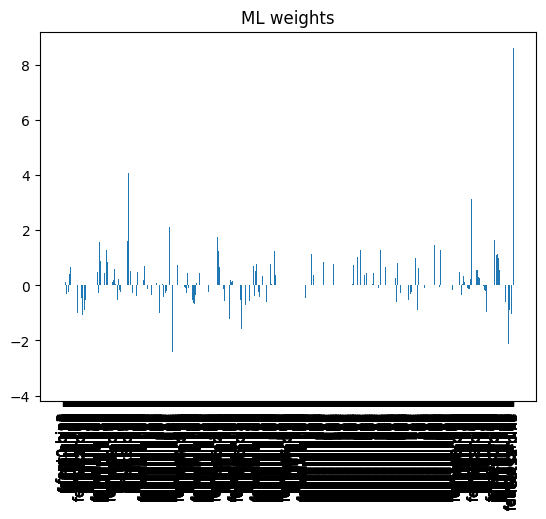

num of zero weights:  1576
num of non-zero weights:  1069
          Feature    Weight
4      feat0-bin5  0.842363
8      feat0-bin9 -1.465025
9     feat0-bin10 -0.328942
10    feat0-bin11 -0.241101
12    feat0-bin13 -1.250241
...           ...       ...
2640  feat11-bin1 -0.851216
2641  feat11-bin2 -0.851154
2642  feat11-bin3  2.573842
2643  feat11-bin4  4.967502
2644  feat11-bin5  8.591352

[1069 rows x 2 columns]


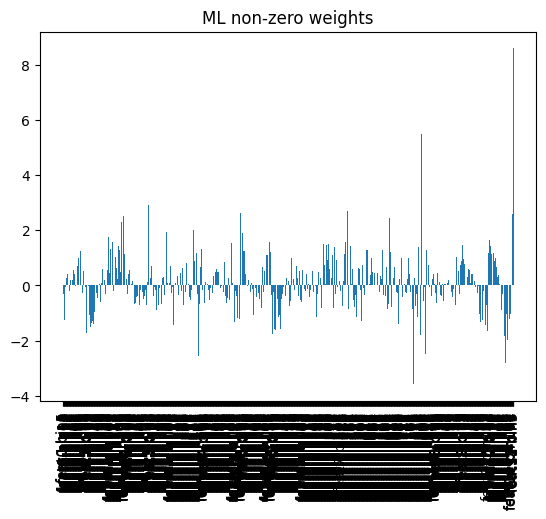

MSEs:  [0.05411644011284945, 0.04488330341113106, 0.055413032324268856, 0.05720882503848127, 0.054643406875320676, 0.05489994869163674, 0.05310415597742432, 0.04669061056952283, 0.05310415597742432, 0.053873781426372495]
accuracies:  [0.8527086308094466, 0.871756004278591, 0.8777068189051707, 0.8916631412459481, 0.8907770255417718, 0.8901124387636395, 0.9040687611044171, 0.9051764057346375, 0.9009673561397998, 0.9069486371429902]
AUCs:  [0.9684005637545556, 0.9688993333871425, 0.9557535772250009, 0.9546170630320294, 0.9528646782153622, 0.9565443758073597, 0.9626958365075685, 0.9688079642939948, 0.958298830777384, 0.9624629442549104]
mean MSE:  0.0527937660404432
mean accuracy:  0.8891885219666413
mean AUC:  0.960934516725531
Execution time: 393.41642022132874 seconds


In [16]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, 
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  11
original num target classes:  7
original num observations:  6497
new num features:  12
new num target classes:  2
new num observations:  38982  (original num observations * 6 )
     0    1    2    3      4     5     6       7     8     9   10   11  \
0  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  0.0   
1  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  1.0   
2  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  2.0   
3  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  3.0   
4  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  4.0   

   (binary_label)  
0               0  
1               0  
2               0  
3               0  
4               0  

discretization thresholds
num of features:  12
categorical features:  Index([], dtype='object')
index categorical features:  []
sbc_column:  11

thresholds  {0: [3.8, 7.4, 16.9], 1: [0.08, 0.545, 2.58], 2: [0.0, 0.23, 2

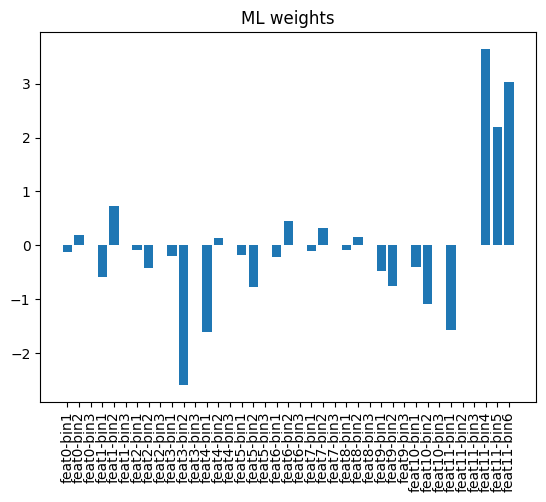

num of zero weights:  13
num of non-zero weights:  26
        Feature    Weight
0    feat0-bin1 -0.128999
1    feat0-bin2  0.195323
3    feat1-bin1 -0.582035
4    feat1-bin2  0.721808
6    feat2-bin1 -0.078648
7    feat2-bin2 -0.425374
9    feat3-bin1 -0.206259
10   feat3-bin2 -2.587753
12   feat4-bin1 -1.602310
13   feat4-bin2  0.138078
15   feat5-bin1 -0.173939
16   feat5-bin2 -0.766455
18   feat6-bin1 -0.212607
19   feat6-bin2  0.456672
21   feat7-bin1 -0.109417
22   feat7-bin2  0.326156
24   feat8-bin1 -0.090787
25   feat8-bin2  0.159687
27   feat9-bin1 -0.483779
28   feat9-bin2 -0.756813
30  feat10-bin1 -0.408037
31  feat10-bin2 -1.079667
33  feat11-bin1 -1.568505
36  feat11-bin4  3.645922
37  feat11-bin5  2.195737
38  feat11-bin6  3.023128


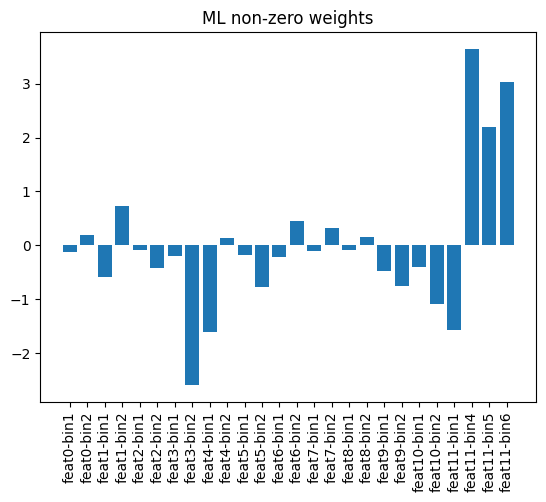

MSEs:  [0.05411644011284945, 0.04411387535265453, 0.055413032324268856, 0.05772190867111339, 0.05361723961005644, 0.05515649050795279, 0.05284761416110826, 0.046947152385838894, 0.05310415597742432, 0.053873781426372495]
accuracies:  [0.8527086308094466, 0.8710915610180394, 0.8777068189051707, 0.8921061990980363, 0.8898909098375954, 0.8898909098375954, 0.903847232178373, 0.9053979346606816, 0.9009673561397998, 0.9069486371429902]
AUCs:  [0.968377798335641, 0.9689852211039571, 0.9557463316882515, 0.9546253436454573, 0.9525386290616409, 0.9564626047497599, 0.9626057848365408, 0.9686785797091848, 0.9582884800105992, 0.9624826107118016]
mean MSE:  0.052691169052963935
mean accuracy:  0.8890556189627729
mean AUC:  0.9608791383852836
Execution time: 180.7945840358734 seconds


In [17]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, 
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [18]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 26


In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  11
original num target classes:  7
original num observations:  6497
new num features:  12
new num target classes:  2
new num observations:  38982  (original num observations * 6 )
     0    1    2    3      4     5     6       7     8     9   10   11  \
0  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  0.0   
1  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  1.0   
2  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  2.0   
3  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  3.0   
4  7.4  0.7  0.0  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4  4.0   

   (binary_label)  
0               0  
1               0  
2               0  
3               0  
4               0  

discretization thresholds

thresholds  {0: [3.8499999999999996, 4.05, 4.300000000000001, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.125, 6.175000000000001, 6.

## car evaluation dataset
evaluate car acceptability

https://archive.ics.uci.edu/dataset/19/car+evaluation

In [ ]:
  # fetch dataset 
car_evaluation_data = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
car_evaluation_X = car_evaluation_data.data.features 
car_evaluation_y = car_evaluation_data.data.targets 
  
# metadata 
print(car_evaluation_data.metadata) 
  
# variable information 
print(car_evaluation_data.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [ ]:
car_evaluation_y = pd.Series(car_evaluation_y['class'], name='class')

In [ ]:
car_evaluation_y.value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Class')

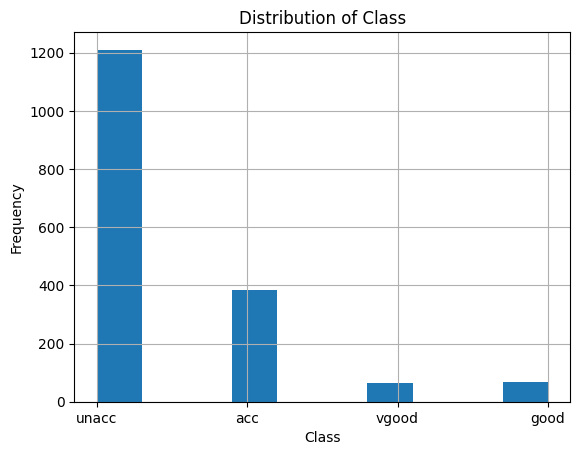

In [ ]:
car_evaluation_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
# get type of each column
print("types: ", car_evaluation_X.dtypes)

# show categorical columns
print("\nobject columns: ", car_evaluation_X.select_dtypes(include=['object']).columns)
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", car_evaluation_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", car_evaluation_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

types:  buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

object columns:  Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

number of unique values in each categorical column:  buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
dtype: int64

values of all categorical columns:  buying      [vhigh, high, med, low]
maint       [vhigh, high, med, low]
doors              [2, 3, 4, 5more]
persons                [2, 4, more]
lug_boot          [small, med, big]
safety             [low, med, high]
dtype: object


In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction
number of features:  6
original num target classes:  4
original num observations:  1728
mapping:  0    unacc
1      acc
2    vgood
3     good
dtype: object
new num features:  7
new num target classes:  2
new num observations:  5184  (original num observations * 3 )
       0      1  2  3      4    5  6  (binary_label)
0  vhigh  vhigh  2  2  small  low  0               1
1  vhigh  vhigh  2  2  small  low  1               1
2  vhigh  vhigh  2  2  small  low  2               1
3  vhigh  vhigh  2  2  small  med  0               1
4  vhigh  vhigh  2  2  small  med  1               1

discretization thresholds
num of features:  7
categorical features:  Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


KeyError: 'buying'

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_infbins_1ook_ml_model, car_infbins_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights,
                show_prints=False)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_diffcoding_ml_model, car_caim_diffcoding_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=None,
                show_prints=False)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
car_infbins_diffcoding_ml_model, car_infbins_diffcoding_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights,
                show_prints=False)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## abalone
predict the age of abalone from physical measurements?

https://archive.ics.uci.edu/dataset/1/abalone

In [ ]:
# fetch dataset 
abalone_data = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
abalone_X = abalone_data.data.features 
abalone_y = abalone_data.data.targets 
  
# metadata 
print(abalone_data.metadata) 
  
# variable information 
print(abalone_data.variables) 

abalone_y  = pd.Series(abalone_y ['class'], name='class')
print(abalone_y .value_counts())
abalone_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

## balance scale

https://archive.ics.uci.edu/dataset/12/balance+scale

In [ ]:
# fetch dataset 
balance_scale_data = fetch_ucirepo(id=12) 
  
# data (as pandas dataframes) 
balance_scale_X = balance_scale_data.data.features 
balance_scale_y = balance_scale_data.data.targets 
  
# metadata 
print(balance_scale_data.metadata) 
  
# variable information 
print(balance_scale_data.variables) 

balance_scale_y  = pd.Series(balance_scale_y['class'], name='class')
print(balance_scale_y.value_counts())
balance_scale_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

## lenses

https://archive.ics.uci.edu/dataset/58/lenses

In [ ]:
# fetch dataset 
lenses_data = fetch_ucirepo(id=58) 
  
# data (as pandas dataframes) 
lenses_X = lenses_data.data.features 
lenses_y = lenses_data.data.targets 
  
# metadata 
print(lenses_data.metadata) 
  
# variable information 
print(lenses_data.variables) 

lenses_y  = pd.Series(lenses_y['class'], name='class')
print(lenses_y.value_counts())
lenses_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

## student performance

https://archive.ics.uci.edu/dataset/320/student+performance

In [ ]:
# fetch dataset 
student_performance_data = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
student_performance_X = student_performance_data.data.features 
student_performance_y = student_performance_data.data.targets 
  
# metadata 
print(student_performance_data.metadata) 
  
# variable information 
print(student_performance_data.variables) 

student_performance_y = pd.Series(student_performance_y['class'], name='class')
print(student_performance_y.value_counts())
student_performance_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')